In [1]:
import k_grid
import sim
import dBar
import scattering
import read_data

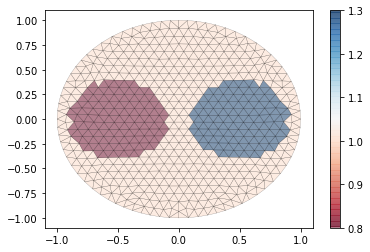

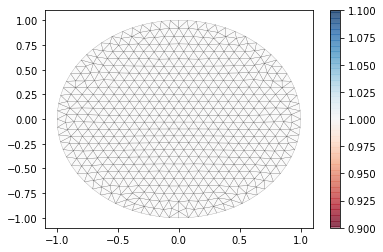

In [2]:
# Number of Electrodes
L = 16

# Defining a type of anomaly
anomaly = [{'x':0.5, 'y':0., 'd':.4, 'perm': 1.3}, {'x':-0.5, 'y':0., 'd':.4, 'perm': 0.8}]
#anomaly = [{'x':0., 'y':0., 'd':.6, 'perm': 1.3}]
no_anomaly = []

Object = sim.sim(anomaly, L)
Object.simulate()

Homo = sim.sim(no_anomaly, L)
Homo.simulate()

In [3]:
Now = read_data.read_data(Object.Current, Object.Voltage, 1, 1, L)
# Frame of Reference - Homogeneous
Ref = read_data.read_data(Homo.Current, Homo.Voltage, 1, 1, L)

In [4]:
Kp = k_grid.k_grid(3.8, 4)
tK = scattering.scattering("exp", Kp, Now, Ref)

In [5]:
# Creates the model which corresponds to the Dbar equation in the spectral parameter at each z of a z_grid.
model = dBar.dBar(1., 5) # Creating a mesh and setting up for the solution

model.solve(Kp, tK)


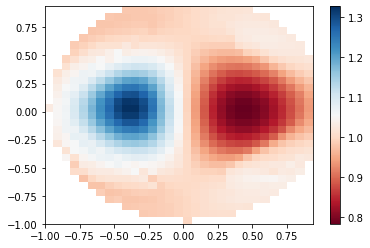

In [6]:
model.plot()